<a href="https://colab.research.google.com/github/ngocbaosp/ML-Projects/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Course: Machine Learning 
#### Project: 01
#### Team members
#### + Mauro Travieso Pena
#### + Quoc Huy Luong
#### + Ngoc Bao Tran
***


## Support Vector Machine Classifier


### Import Libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Install library
# !pip3 install -U yellowbrick

%matplotlib inline

In [0]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


# MyPCA

def myPCA(data,n):
    pca = PCA(n_components=n)
    pca.fit(data)
    df = pca.transform(data)
    PCA_Data = pd.DataFrame(df)
    return PCA_Data



# myNormalize

def myNormalize(data):
    min_max_scaler = preprocessing.MinMaxScaler()
    Normalized_Data = min_max_scaler.fit_transform(data)
    Normalized_Data = pd.DataFrame(Normalized_Data)
    return Normalized_Data



# myEncode

def myEncode(data,col): 
    NewData_Encode = data.copy()
    NewData_Encode = pd.get_dummies(NewData_Encode, columns=col, prefix = col)
    return NewData_Encode



# myCleanAndTransformData


def myCleanAndTransformData(data):
    
    #Drop null rows
    NewData = data.dropna()
    #Remove unknown ata
    NewData = NewData[NewData['episodes']!='Unknown']
    #Add a new column rating class 
    NewData['Class']=1
    # 1: High
    # or 0: Low based on rating
    NewData.loc[NewData['rating'] >= NewData['rating'].mean(), 'Class'] = 1
    NewData.loc[NewData['rating'] < NewData['rating'].mean(), 'Class'] = 0
    
    #Split genre values into rows
    NewData = pd.DataFrame(NewData.genre.str.split(',').tolist(), index=[NewData.anime_id,NewData.type,NewData.episodes,NewData.rating,NewData.members,NewData.Class]).stack()
    NewData = NewData.reset_index([0,'anime_id','type','episodes','rating','members','Class'])
    NewData.columns=['anime_id','type','episodes','rating','members','Class','genre']
    
    #Encode type feature: 6 unique values
    NewData = myEncode(NewData,['type'])
 
    #Encode genre feature: 82 unique values
    NewData = myEncode(NewData,['genre'])
 
     #Drop anmie_id,rating,Class
    NewData = NewData.drop(['rating'],axis=1)
    NewData = NewData.drop(columns=['anime_id'])
    #NewData = NewData.drop(columns=['Class'])  
    
    return NewData

### Load data from files


In [3]:
df = pd.read_csv('anime.csv')
df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


### Clean and Transform Data


In [4]:
cleaned_data= myCleanAndTransformData(df)
df_test = cleaned_data['Class']
df_train = cleaned_data.drop(columns=['Class'])
df_train.head()

,episodes,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,genre_ Adventure,genre_ Cars,genre_ Comedy,genre_ Dementia,genre_ Demons,genre_ Drama,genre_ Ecchi,genre_ Fantasy,genre_ Game,genre_ Harem,genre_ Hentai,genre_ Historical,genre_ Horror,genre_ Josei,genre_ Kids,genre_ Magic,genre_ Martial Arts,genre_ Mecha,genre_ Military,genre_ Music,genre_ Mystery,genre_ Parody,genre_ Police,genre_ Psychological,genre_ Romance,genre_ Samurai,genre_ School,genre_ Sci-Fi,genre_ Seinen,genre_ Shoujo,genre_ Shoujo Ai,genre_ Shounen,...,genre_Action,genre_Adventure,genre_Cars,genre_Comedy,genre_Dementia,genre_Demons,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Game,genre_Harem,genre_Hentai,genre_Historical,genre_Horror,genre_Josei,genre_Kids,genre_Magic,genre_Martial Arts,genre_Mecha,genre_Military,genre_Music,genre_Mystery,genre_Parody,genre_Police,genre_Psychological,genre_Romance,genre_Samurai,genre_School,genre_Sci-Fi,genre_Seinen,genre_Shoujo,genre_Shounen,genre_Slice of Life,genre_Space,genre_Sports,genre_Super Power,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi
0,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,200630,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,64,793665,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(35201, 90)

### Normalize Data


In [6]:
scaled_df = myNormalize(df_train)
scaled_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.197867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.034673,0.782769,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
scaled_df.shape

(35201, 90)

### Using PCA


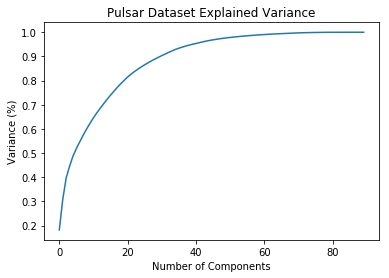

In [8]:
# https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_df)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()


In [9]:
# Now we will choose 40 components so we can preserve something around 98.8% or 99% of the total variance of the data
pca = PCA(n_components=40)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df))
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.311566,0.786508,-0.420821,0.005236,-0.078664,-0.049645,-0.062637,0.007171,-0.075350,-0.030938,0.086265,-0.139423,-0.157022,0.028296,-0.081141,-0.232689,-0.299073,0.804717,-0.258786,-0.007700,-0.094839,-0.108073,-0.062471,0.025714,0.003366,-0.025014,-0.033504,-0.004883,-0.011656,-0.006690,-0.011787,-0.014544,0.009478,-0.010434,-0.008213,-0.004174,0.005425,-0.013858,-0.006214,-0.008874
1,-0.284842,0.763991,-0.412009,-0.010872,-0.110067,-0.087028,-0.096769,0.054629,-0.179466,-0.045545,0.764386,0.581467,0.033981,-0.066736,0.030946,0.068189,0.010379,-0.031950,-0.043615,0.008150,-0.027478,-0.040209,-0.033358,0.004746,0.006595,-0.016164,-0.028681,-0.009389,-0.005252,-0.004005,-0.007256,-0.013033,0.006352,-0.011301,-0.008298,-0.001423,0.008509,-0.013355,-0.007986,-0.009279
2,-0.284838,0.767910,-0.395570,-0.007614,-0.091869,-0.059765,-0.062085,0.036504,-0.086830,-0.024721,0.092181,-0.282590,-0.451933,-0.569129,0.527434,0.287048,0.035417,-0.060918,-0.105733,-0.014497,-0.031120,-0.062861,-0.045534,0.012579,0.004915,-0.021767,-0.033705,-0.011322,-0.009017,-0.006088,-0.009498,-0.014740,0.006563,-0.012677,-0.009927,-0.005380,0.006646,-0.015320,-0.012594,-0.009188
3,-0.291600,0.777175,-0.408316,0.000301,-0.080828,-0.049799,-0.056890,0.019143,-0.070776,-0.027971,0.078032,-0.143403,-0.122692,-0.013063,-0.109523,-0.389584,-0.602806,-0.563641,-0.290748,-0.050592,-0.053026,-0.099448,-0.061852,0.024383,0.000885,-0.027293,-0.035589,-0.010710,-0.013535,-0.007623,-0.012277,-0.015438,0.007616,-0.011252,-0.009393,-0.007848,0.004387,-0.014895,-0.011570,-0.011031
4,0.732145,-0.153155,-0.102203,-0.458230,0.816867,0.046173,0.015772,-0.064781,0.014352,-0.005005,0.000576,0.017523,-0.007151,0.008119,0.015722,-0.003248,-0.012146,-0.006515,-0.013967,0.005152,-0.027978,-0.018781,-0.009747,-0.001084,0.018600,0.005340,-0.018046,0.010424,0.021960,0.001642,0.006701,-0.013303,0.020035,-0.014327,-0.006988,0.027046,0.026039,-0.021470,0.001149,0.043147


### Splitting data


In [0]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set with PCA data
X_train, X_test, y_train, y_test = train_test_split(pca_df, df_test, test_size=0.3, random_state=109)



### Generating model


In [11]:
#Import svm model
from sklearn import svm

# Create a svm Classifier with PCA data
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Evaluating model


In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import model_selection

# Model Accuracy: how often is the classifier correct?
# Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Predict with PCA data:")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))


Predict with PCA data:
Accuracy:  0.6921693021494176
Classification report:                precision    recall  f1-score   support

           0       0.67      0.27      0.38      3748
           1       0.70      0.93      0.80      6813

    accuracy                           0.69     10561
   macro avg       0.68      0.60      0.59     10561
weighted avg       0.69      0.69      0.65     10561



In [13]:
# Compute the accuracy score for all the cross validation folds.
scores = model_selection.cross_val_score(clf, X_test, y_test, cv=5)

# Take the mean of the scores (because we have one for each fold)
print("Accuracy and the 95% confidence interval of the estimate are: {0:.3f} (+/- {0:.2f})".format(scores.mean(), scores.std() * 2))

Accuracy and the 95% confidence interval of the estimate are: 0.691 (+/- 0.69)


### Model Tunning with Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import decomposition


# Use Principal Component Analysis to reduce dimensionality and improve generalization
pca = decomposition.PCA()


# Combine PCA and SVC to a pipeline
pipe = Pipeline(steps=[('pca', pca), ('svm', clf)])


# Check the training time for the SVC
n_components = [40]
# params_grid = {
#     'svm__C': [0.1, 1, 10, 100, 1000],
#     'svm__kernel': ['linear', 'rbf'],
#     'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#     'pca__n_components': n_components,
# }
params_grid = {
    'svm__C': [1],
    'svm__kernel': ['linear'],
    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'pca__n_components': n_components,
}

In [0]:
# Apply Grid Search to find the best estimator
grid = GridSearchCV(pipe, params_grid, refit=True, verbose=3, cv=5, scoring="accuracy", n_jobs=1)


In [16]:
# Train the model
grid.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear, score=0.688, total=  29.3s
[CV] pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.3s remaining:    0.0s


[CV]  pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear, score=0.683, total=  27.7s
[CV] pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.0s remaining:    0.0s


[CV]  pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear, score=0.689, total=  28.8s
[CV] pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear 
[CV]  pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear, score=0.695, total=  29.5s
[CV] pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear 
[CV]  pca__n_components=40, svm__C=1, svm__gamma=1, svm__kernel=linear, score=0.695, total=  28.1s
[CV] pca__n_components=40, svm__C=1, svm__gamma=0.1, svm__kernel=linear 
[CV]  pca__n_components=40, svm__C=1, svm__gamma=0.1, svm__kernel=linear, score=0.688, total=  29.2s
[CV] pca__n_components=40, svm__C=1, svm__gamma=0.1, svm__kernel=linear 
[CV]  pca__n_components=40, svm__C=1, svm__gamma=0.1, svm__kernel=linear, score=0.683, total=  27.7s
[CV] pca__n_components=40, svm__C=1, svm__gamma=0.1, svm__kernel=linear 
[CV]  pca__n_components=40, svm__C=1, svm__gamma=0.1, svm__kernel=linear, score=0.689, total=  28.9s
[CV] pca__n_components=40, svm__C=1, sv

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 12.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svm',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                         

In [17]:
print("The best score is: {}".format(grid.best_score_))
print("The best estimator is: {}".format(grid.best_estimator_))
print("The best params is: {}".format(grid.best_params_))


The best score is: 0.6898944805194805
The best estimator is: Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=40,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svm',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1,
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
The best params is: {'pca__n_components': 40, 'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'linear'}


In [0]:
# Re-run predictions with best model
model = grid.best_estimator_
grid_predictions = grid.predict(X_test)


In [19]:
# Re-evaluate model
print("With normalized data and the best estimator from Grid Search:")
print("Accuracy: ", metrics.accuracy_score(y_test, grid_predictions))
print("Classification report: ")
print(classification_report(y_test, grid_predictions))


With normalized data and the best estimator from Grid Search:
Accuracy:  0.6921693021494176
Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.27      0.38      3748
           1       0.70      0.93      0.80      6813

    accuracy                           0.69     10561
   macro avg       0.68      0.60      0.59     10561
weighted avg       0.69      0.69      0.65     10561



### AUC

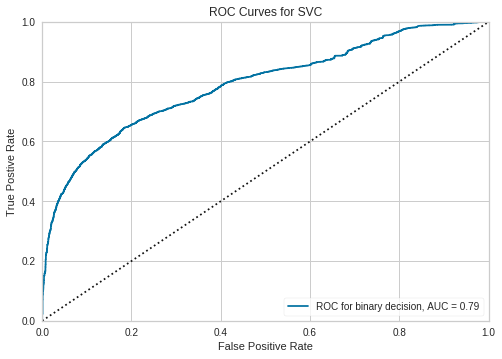

In [20]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, micro=False, macro=False, per_class=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data


### Validation Curve

In [0]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

# Create the validation curve visualizer
cv = StratifiedKFold(12)

# param_range = np.linspace(0.1, 1.2)

# v_viz = ValidationCurve(
#     clf, param_name="C", param_range=param_range,
#     cv=cv, scoring="accuracy", n_jobs=1
# )

# v_viz.fit(X_train, y_train)
# v_viz.poof()

### Learning Curve

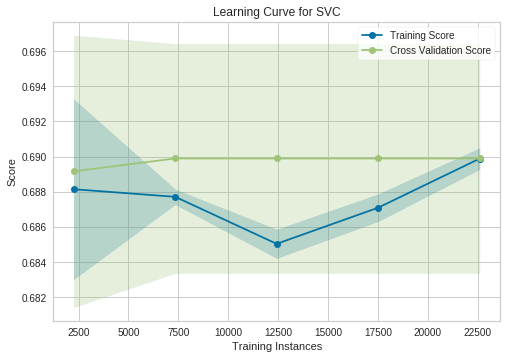

In [25]:
from yellowbrick.model_selection import LearningCurve


l_viz = LearningCurve(
    clf, cv=cv,
    scoring='accuracy', n_jobs=1
)

# Fit and poof the visualizer
l_viz.fit(X_train, y_train)
l_viz.poof()

Our learning algorithm (SVM) suffers from high bias and quite a low variance, underfitting the training data.  
One solution at this point is to change to a more complex learning algorithm. This should decrease the bias and increase the variance.